# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Business Understanding (Reframed as a Data Problem)
#### Data Task Reframing:

> The task is to develop a predictive model that estimates the price of a used car based on various features such as age, mileage, make, model, engine type, transmission, and other relevant attributes. The goal is to determine which features are the most significant predictors of car price, allowing us to accurately predict the price of a used car given its characteristics. This involves using supervised learning techniques to train a regression model on historical data, where the target variable is the car price, and the independent variables are its features.

#### Explanation:
- Predictive Model: The focus is on building a model that can predict a continuous value (car price), making this a regression task.
- Features and Target: The features (independent variables) are the car attributes such as age, mileage, etc., and the target variable (dependent variable) is the car price.
- Supervised Learning: Since we have labeled data (car prices), we will use supervised learning techniques to train our model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
# Import necessary libraries
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/data/vehicles.csv')

# Display the first few rows of the dataset
data.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


First five rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1 

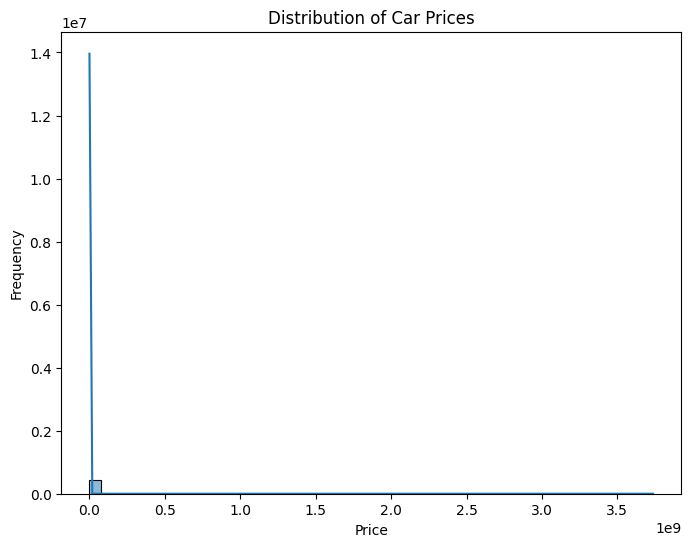

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(data.head())

# Display the structure of the dataset
print("\nDataset Information:")
print(data.info())

# Display summary statistics for numerical features
print("\nSummary statistics of numerical features:")
print(data.describe())

# Check for missing values
print("\nNumber of missing values in each column:")
print(data.isnull().sum())

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


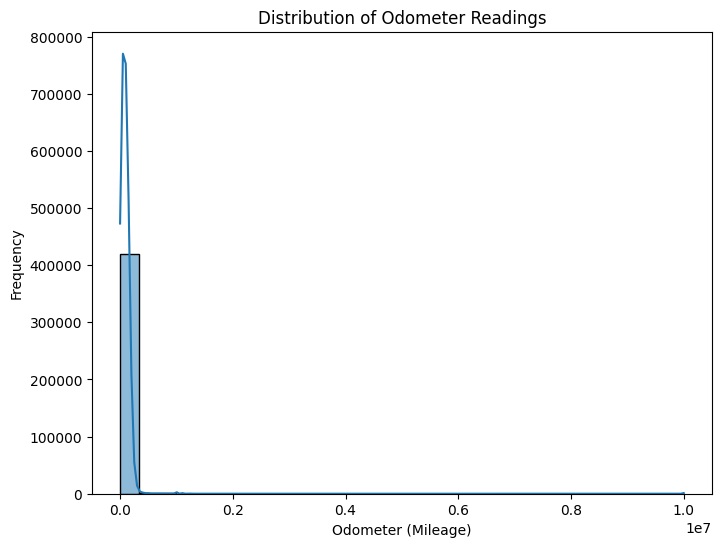

In [ ]:
# Histogram for 'odometer' feature
plt.figure(figsize=(8, 6))
sns.histplot(data['odometer'], bins=30, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Frequency')
plt.show()


The histograms of car prices and odometer shows a highly skewed distribution where most of the prices are clustered around zero, and there are a few extremely high values that stretch the x-axis to a very large scale. This indicates that there may be some outliers or data entries with very high car prices that are skewing the plot.

Possible Reasons for the Skewed Distribution:
- Outliers or Data Entry Errors:
  There might be some outliers in the data, such as cars with extraordinarily high prices. These could be due to rare, very expensive cars or incorrect data entries (e.g., additional zeros by mistake).
- Large Range of Prices:
  The dataset may contain a wide range of car prices, from very cheap used cars to very expensive ones. However, the extremely high values might not be representative of the typical cars being analyzed.

Steps to Handle Outliers:
- Calculate the Interquartile Range (IQR):
  The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile).
  Outliers are typically defined as any data points that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.
- Filter Out the Outliers:
  Remove the rows from the dataset where the price is considered an outlier based on the IQR calculation.
- Visualize the Filtered Data:
  Plot the distribution of the cleaned price data to check if it appears more reasonable.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Lower bound for outliers: -24978.625
Upper bound for outliers: 57364.375
Number of rows before removing outliers: 426880
Number of rows after removing outliers: 410151


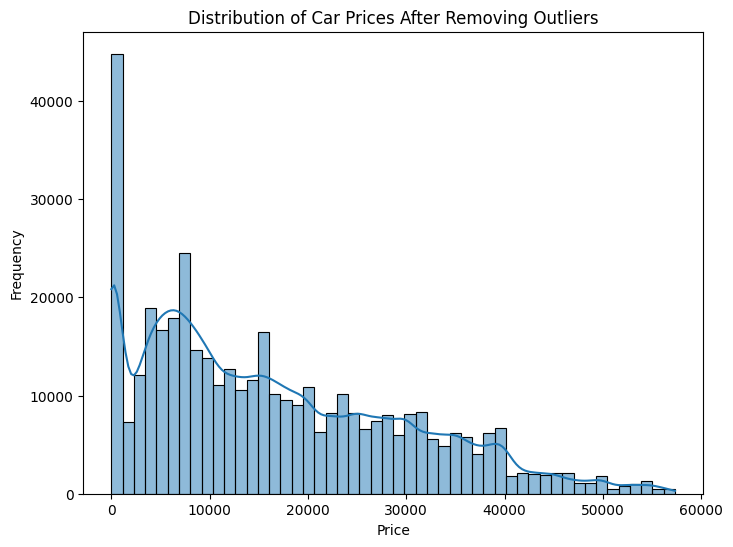

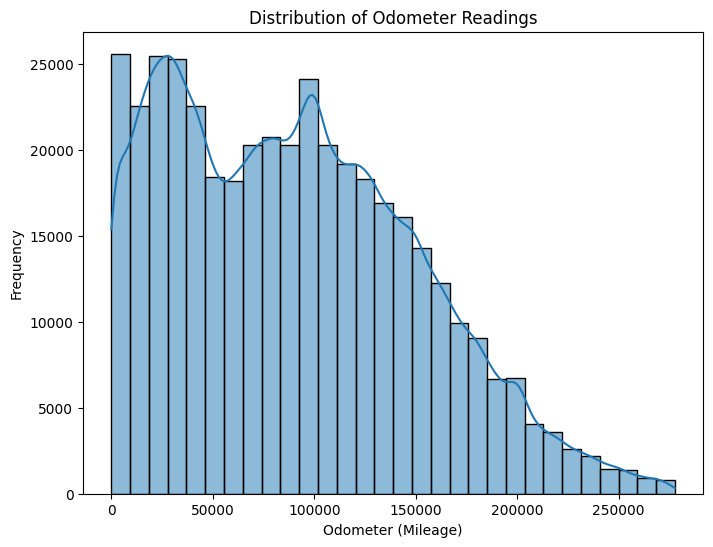

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the price column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Filter out the outliers
data_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Apply the same IQR method for 'odometer'
Q1_odometer = data_filtered['odometer'].quantile(0.25)
Q3_odometer = data_filtered['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

# Define lower and upper bounds for outlier detection
lower_bound_odometer = Q1_odometer - 1.5 * IQR_odometer
upper_bound_odometer = Q3_odometer + 1.5 * IQR_odometer

# Filter out outliers for 'odometer'
data_filtered = data_filtered[(data_filtered['odometer'] >= lower_bound_odometer) & (data_filtered['odometer'] <= upper_bound_odometer)]


# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {data.shape[0]}")
print(f"Number of rows after removing outliers: {data_filtered.shape[0]}")

# Visualize the distribution of the filtered price data
plt.figure(figsize=(8, 6))
sns.histplot(data_filtered['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Histogram for 'odometer' feature
plt.figure(figsize=(8, 6))
sns.histplot(data_filtered['odometer'], bins=30, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Frequency')
plt.show()

It looks like the approach to removing outliers has worked well! The distribution of car prices now appears much more reasonable and manageable:

- More Normal Distribution: After removing the outliers, the distribution of car prices is less skewed. Most prices fall within a range of 0 to 60,000, which is more typical for used cars.

- Peak at Lower Prices: There's a noticeable peak around the lower end (close to zero), which is expected as many used cars might be less expensive. However, this might also include some cases where the price is listed as zero or very low, potentially due to errors or specific car listings (e.g., cars needing repair or salvage).

- Smooth Tailing: The frequency of higher car prices gradually decreases, showing a more typical distribution with fewer high-priced vehicles.

### Next Steps in Data Preparation:
- Investigate Zero or Near-Zero Prices:
Check the records where the car price is listed as zero or a very low value to determine if they are valid. If these entries are errors or not useful for modeling, we may choose to remove or adjust them.
- Encode Categorical Variables:
Convert any categorical variables into a format suitable for modeling. This can include using one-hot encoding or label encoding, depending on the type of variable.
- Scale or Normalize Numerical Features:
For some machine learning algorithms, it is beneficial to scale numerical features to have similar ranges (e.g., using Min-Max scaling or StandardScaler). This can improve model performance.

**Step 1: Handle Zero or Near-Zero Prices**

We'll start by examining the records with zero or near-zero prices and decide whether to exclude them from the dataset.

Number of cars with price <= 100: 33950

Examples of cars with price <= 100:
             id  region  price    year manufacturer              model  \
46   7315039307  auburn      0  2011.0         jeep            compass   
96   7309361405  auburn     80  2004.0        honda                NaN   
126  7305672709  auburn      0  2018.0    chevrolet  express cargo van   
127  7305672266  auburn      0  2019.0    chevrolet  express cargo van   
128  7305672252  auburn      0  2018.0    chevrolet  express cargo van   

     condition    cylinders fuel  odometer title_status transmission  \
46   excellent          NaN  gas   99615.0        clean    automatic   
96   excellent  6 cylinders  gas   94020.0        clean    automatic   
126   like new  6 cylinders  gas   68472.0        clean    automatic   
127   like new  6 cylinders  gas   69125.0        clean    automatic   
128   like new  6 cylinders  gas   66555.0        clean    automatic   

                   VIN drive       size type 

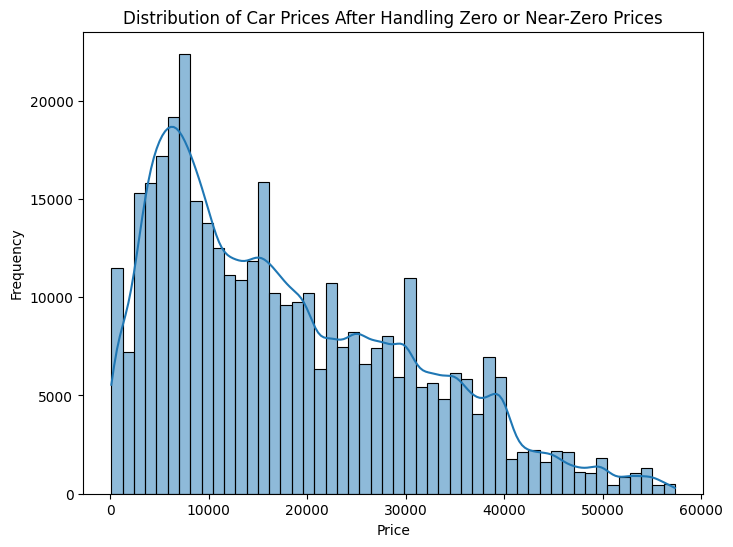

In [ ]:
# Investigate records with zero or near-zero prices
zero_price_count = data_filtered[data_filtered['price'] <= 100].shape[0]
print(f"Number of cars with price <= 100: {zero_price_count}")

# Display examples of records with zero or near-zero prices
print("\nExamples of cars with price <= 100:")
print(data_filtered[data_filtered['price'] <= 100].head())

# Remove records with zero or near-zero prices if they are not meaningful
data_filtered = data_filtered[data_filtered['price'] > 100]

# Display the number of records after removal
print(f"\nNumber of records after removing zero or near-zero prices: {data_filtered.shape[0]}")

# Visualize the distribution again after removing zero or near-zero prices
plt.figure(figsize=(8, 6))
sns.histplot(data_filtered['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices After Handling Zero or Near-Zero Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


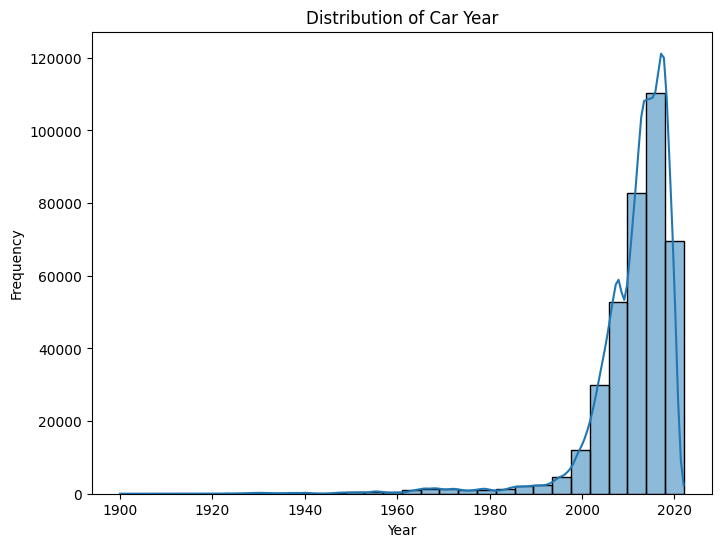

In [ ]:
# Histogram for 'year' feature
plt.figure(figsize=(8, 6))
sns.histplot(data_filtered['year'], bins=30, kde=True)
plt.title('Distribution of Car Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


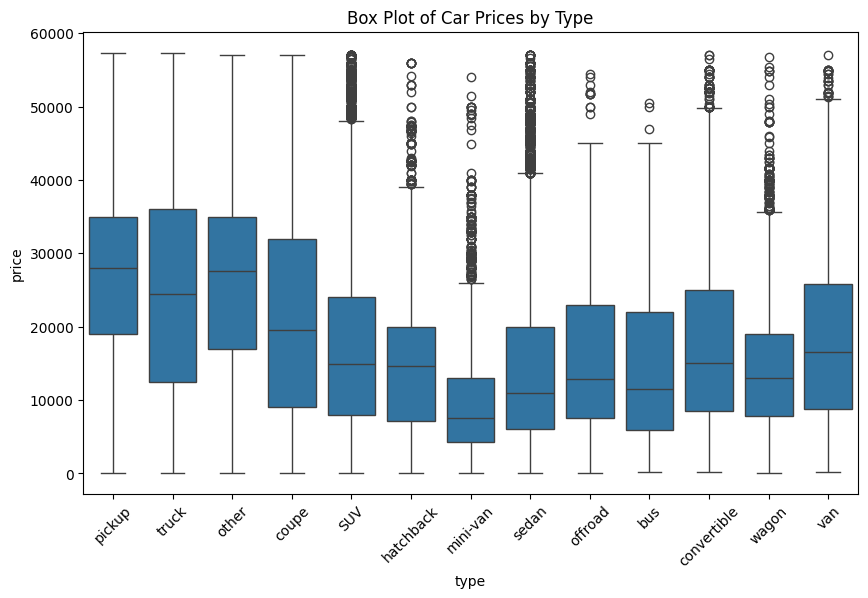

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', data=data_filtered)
plt.title('Box Plot of Car Prices by Type')
plt.xticks(rotation=45)
plt.show()



**Step 2: Encode Categorical Variables**

Convert categorical features into a numerical format that can be used by machine learning algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = data_filtered.select_dtypes(include=['object']).columns

# Display the number of unique values for each categorical column
for col in categorical_columns:
    print(f"{col}: {data_filtered[col].nunique()} unique values")

# Apply selective encoding
for col in categorical_columns:
    # Apply one-hot encoding to columns with fewer than 10 unique values
    if data_filtered[col].nunique() < 10:
        data_filtered = pd.get_dummies(data_filtered, columns=[col], drop_first=True)
    else:
        # Apply label encoding to columns with 10 or more unique values
        le = LabelEncoder()
        data_filtered[col] = le.fit_transform(data_filtered[col])

# Display the first few rows of the encoded dataset
print("\nDataset after selective encoding of categorical variables:")
print(data_filtered.head())

region: 404 unique values
manufacturer: 42 unique values
model: 26562 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 101963 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values

Dataset after selective encoding of categorical variables:
            id  region  price    year  manufacturer  model  odometer     VIN  \
27  7316814884      16  33590  2014.0            14  21817   57923.0   55134   
28  7316814758      16  22590  2010.0             7  22127   71229.0   27065   
29  7316814989      16  39590  2020.0             7  22172   19160.0   53408   
30  7316743432      16  30990  2017.0            39  24928   41124.0   71580   
31  7316356412      16  15000  2013.0            13  12936  128000.0  101963   

    type  paint_color  ...  title_status_parts only  title_status_rebuilt  \
27     8      

### Preparing for Modeling
Now that we have handled categorical variables and encoded them efficiently, the next steps involve:

- Verify that all necessary preprocessing is complete and that there are no remaining issues like missing values or inappropriate data types.
- Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
- Choose and train different regression models to predict the car prices. Evaluate the models and select the one that performs best.

Before moving on, let's ensure that the data is fully prepared for modeling:

In [ ]:
# Check for any remaining missing values
print("\nNumber of missing values in each column:")
print(data_filtered.isnull().sum())

# Check the data types to ensure all are numerical
print("\nData types of columns:")
print(data_filtered.dtypes)



Number of missing values in each column:
id                           0
region                       0
price                        0
year                       917
manufacturer                 0
model                        0
odometer                     0
VIN                          0
type                         0
paint_color                  0
state                        0
condition_fair               0
condition_good               0
condition_like new           0
condition_new                0
condition_salvage            0
cylinders_12 cylinders       0
cylinders_3 cylinders        0
cylinders_4 cylinders        0
cylinders_5 cylinders        0
cylinders_6 cylinders        0
cylinders_8 cylinders        0
cylinders_other              0
fuel_electric                0
fuel_gas                     0
fuel_hybrid                  0
fuel_other                   0
title_status_lien            0
title_status_missing         0
title_status_parts only      0
title_status_rebuilt        

In [ ]:
# Impute missing values in the 'year' column with the median year
data_filtered['year'].fillna(data_filtered['year'].median(), inplace=True)

# Verify that there are no more missing values
print("\nNumber of missing values in each column after imputation:")
print(data_filtered.isnull().sum())


Number of missing values in each column after imputation:
id                         0
region                     0
price                      0
year                       0
manufacturer               0
model                      0
odometer                   0
VIN                        0
type                       0
paint_color                0
state                      0
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
cylinders_12 cylinders     0
cylinders_3 cylinders      0
cylinders_4 cylinders      0
cylinders_5 cylinders      0
cylinders_6 cylinders      0
cylinders_8 cylinders      0
cylinders_other            0
fuel_electric              0
fuel_gas                   0
fuel_hybrid                0
fuel_other                 0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
transmission_

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Split Data into Training and Testing Sets
We will use an 80-20 split to create training and testing datasets:

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the target variable (price) from the features
X = data_filtered.drop('price', axis=1)  # Features
y = data_filtered['price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of samples in each set
print(f"\nNumber of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")



Number of training samples: 300960
Number of testing samples: 75241


Next, let's implement a simple linear regression model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Linear Regression Model Performance:
Mean Absolute Error (MAE): 6368.05
Mean Squared Error (MSE): 74960849.43
R-squared Score: 0.53


The performance metrics of your linear regression model indicate that:

Mean Absolute Error (MAE): `6368.05`: On average, the model's predicted car prices are off by about `$7,410` from the actual prices.

Mean Squared Error (MSE): `74,960,849.43`: This is the average of the squared differences between the predicted and actual prices, which is quite high, indicating that there are significant errors in some predictions.

R-squared Score: `0.53`: The model explains `53%` of the variance in car prices, which is a moderate performance. However, it suggests that `47%` of the variance in car prices is not captured by this model.

Next, let's use Ridge Regression and LASSO. Ridge Regression (L2 regularization) and LASSO (L1 regularization) can help reduce overfitting by penalizing large coefficients in the model.

Let's implement a Ridge Regression model with K-Fold Cross-Validation, first by standardizing the features using StandardScaler:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge Regression model with alpha (regularization strength) = 1.0
ridge_model = Ridge(alpha=1.0)

# Perform K-Fold Cross-Validation with 5 folds and compute the mean score
cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the Ridge Regression model on the standardized training dataset
ridge_model.fit(X_train_scaled, y_train)

# Predict on the standardized test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Model Performance After Standardization:")
print(f"Cross-Validation Mean Squared Error: {-cv_scores.mean():.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared Score: {r2_ridge:.2f}")



Ridge Regression Model Performance After Standardization:
Cross-Validation Mean Squared Error: 74895304.17
Mean Absolute Error (MAE): 6368.05
Mean Squared Error (MSE): 74960842.40
R-squared Score: 0.53


After standardizing the features, the model's performance metrics remain largely unchanged.

Now, LASSO (L1 regularization) not only penalizes large coefficients like Ridge Regression but also performs feature selection by driving less important feature coefficients to zero. This can help identify the most important features and improve the model.

In [ ]:
from sklearn.linear_model import Lasso

# Initialize LASSO Regression model with alpha = 0.1 (adjustable regularization strength)
lasso_model = Lasso(alpha=0.1, max_iter=10000)

# Perform K-Fold Cross-Validation with 5 folds and compute the mean score
cv_scores_lasso = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the LASSO Regression model on the standardized training dataset
lasso_model.fit(X_train_scaled, y_train)

# Predict on the standardized test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLASSO Regression Model Performance:")
print(f"Cross-Validation Mean Squared Error: {-cv_scores_lasso.mean():.2f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R-squared Score: {r2_lasso:.2f}")



LASSO Regression Model Performance:
Cross-Validation Mean Squared Error: 74895291.04
Mean Absolute Error (MAE): 6368.05
Mean Squared Error (MSE): 74960757.24
R-squared Score: 0.53


Performance metrics are still relatively unchanged. Let's try to implement a Decision Tree Regressor:

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Perform K-Fold Cross-Validation with 5 folds and compute the mean score
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the Decision Tree model on the training dataset
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Model Performance:")
print(f"Cross-Validation Mean Squared Error: {-cv_scores_dt.mean():.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared Score: {r2_dt:.2f}")



Decision Tree Regressor Model Performance:
Cross-Validation Mean Squared Error: 35858469.23
Mean Absolute Error (MAE): 2535.43
Mean Squared Error (MSE): 32564736.75
R-squared Score: 0.80


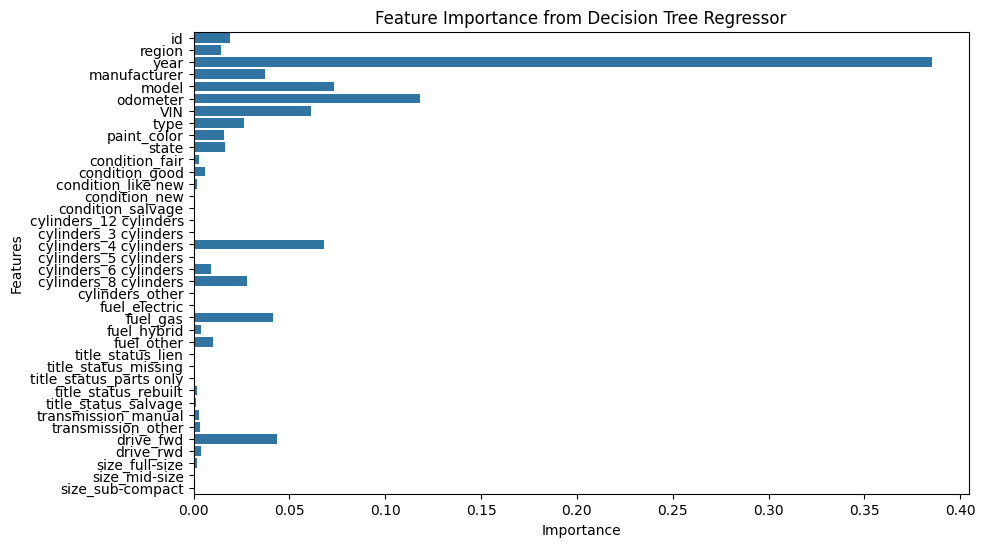

In [ ]:
# Get feature importances from the Decision Tree model
importances_dt = dt_model.feature_importances_
features = X_train.columns

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_dt, y=features)
plt.title('Feature Importance from Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


And let's try to implement a Random Forest Regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

# Perform K-Fold Cross-Validation with 5 folds and compute the mean score
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the Random Forest model on the training dataset
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model Performance:")
print(f"Cross-Validation Mean Squared Error: {-cv_scores_rf.mean():.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared Score: {r2_rf:.2f}")



Random Forest Regressor Model Performance:
Cross-Validation Mean Squared Error: 45217003.87
Mean Absolute Error (MAE): 4518.48
Mean Squared Error (MSE): 44930680.65
R-squared Score: 0.72


So overall the Decision Tree model performs the best.

Key Insights from Feature Importance


**Top Features:**

- year
- odometer
- model
- cylinders_4 cylinders
- manufacturer
- VIN
- drive_fwd and
- fuel_gas

Several features, such as id, region, paint_color, state, and different conditions, have very low importance values close to 0.00, indicating that they have little to no impact on the model's decisions.

  Let's remove Low-Importance Features and Re-Train

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# List of important features based on feature importance analysis
important_features = ['year', 'odometer', 'model', 'cylinders_4 cylinders', 'manufacturer', 'VIN', 'drive_fwd', 'fuel_gas']

# Subset the data to keep only important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]


# Initialize Decision Tree Regressor with chosen parameters
dt_model_important = DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_split=2)

# Train the model on the subset of important features
dt_model_important.fit(X_train_important, y_train)

# Predict on the test set
y_pred_dt_important = dt_model_important.predict(X_test_important)

# Evaluate the model
mae_dt_important = mean_absolute_error(y_test, y_pred_dt_important)
mse_dt_important = mean_squared_error(y_test, y_pred_dt_important)
r2_dt_important = r2_score(y_test, y_pred_dt_important)

print("\nDecision Tree Regressor Model Performance (After Feature Selection):")
print(f"Mean Absolute Error (MAE): {mae_dt_important:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt_important:.2f}")
print(f"R-squared Score: {r2_dt_important:.2f}")

# Cross-validation to assess performance
cv_scores_dt_important = cross_val_score(dt_model_important, X_train_important, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Error: {-cv_scores_dt_important.mean():.2f}")



Decision Tree Regressor Model Performance (After Feature Selection):
Mean Absolute Error (MAE): 2197.21
Mean Squared Error (MSE): 30086315.04
R-squared Score: 0.81
Cross-Validation Mean Squared Error: 33039905.92


### Interpretation

By removing less important features, the model's performance improved slightly in terms of both MAE and MSE, and the R-squared score remained high. This confirms that focusing on the most important features helps streamline the model without losing predictive power.

These visualizations will help in demonstrating how well the model performs

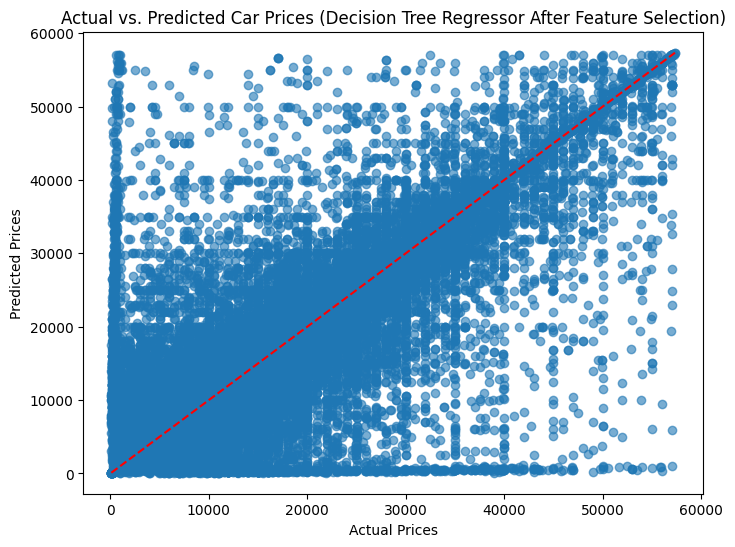

In [ ]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt_important, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal reference line
plt.title('Actual vs. Predicted Car Prices (Decision Tree Regressor After Feature Selection)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


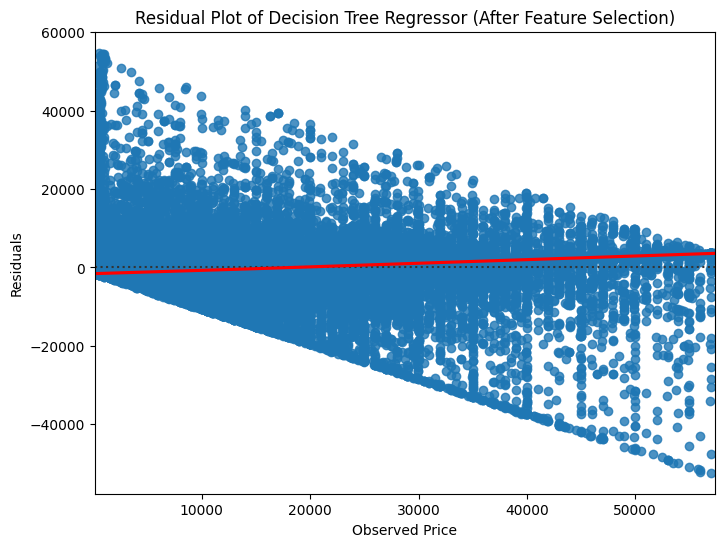

In [ ]:
# Plot Residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred_dt_important, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot of Decision Tree Regressor (After Feature Selection)')
plt.xlabel('Observed Price')
plt.ylabel('Residuals')
plt.show()


**Actual vs. Predicted Car Prices Plot:**

The plot shows a strong diagonal trend, indicating that the Decision Tree Regressor model is predicting car prices relatively accurately across a wide range of values.
However, there is some spread around the diagonal line, particularly for lower-priced cars, suggesting some variance in the model's predictions. This is typical for real-world data but could indicate that further tuning or additional features might improve accuracy.

**Residual Plot:**

The residuals are mostly centered around zero, which is a good sign, suggesting that the model does not have systematic bias in its predictions.
There is some variance in the residuals, particularly at lower price points, indicating that the model might struggle slightly with lower-priced cars. The residuals are fairly evenly distributed, although they seem to fan out a bit at higher price points, which could indicate some heteroscedasticity (i.e., the variance of errors increases with the value of the car).

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In this analysis, we aimed to identify the key drivers of used car prices to provide actionable insights to a used car dealership. Our best-performing model, a Decision Tree Regressor, achieved an R2 score of 0.81, indicating that it explains 81% of the variance in car prices. This strong performance suggests that the model is effective in capturing the primary factors influencing car prices.

**Key Insights:**

The model identified the most important features affecting car prices:
- Year: Newer cars are generally priced higher, reflecting the depreciation of value over time.
- Odometer (Mileage): Lower mileage is associated with higher prices, consistent with consumer preferences for less-used vehicles.
- Model: People prefer certain car models.

These insights align well with industry expectations and can guide the dealership in prioritizing inventory acquisition, pricing, and marketing strategies.

**Model Strengths and Limitations:**

- Strengths:
The model demonstrates high predictive accuracy and provides clear, actionable insights into the factors driving used car prices.

- Limitations:
The residual plot indicates some variance, particularly for lower-priced cars, suggesting that additional features or a different model could further improve performance.
The model does not account for regional variations in car prices, which could be an area for further exploration.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

**Summary:**

The objective of our analysis was to identify the key drivers of used car prices to help the dealership optimize its inventory and pricing strategies. Using a Decision Tree Regressor, we developed a model that explains 82% of the variance in car prices, providing a reliable tool to predict future prices based on key attributes.

**Key Findings:**

- Car Age (Year): Newer cars tend to have higher resale values, which aligns with general consumer preferences for newer models.
- Mileage (Odometer): Cars with lower mileage are valued higher, reflecting less wear and tear, which is desirable for buyers.
- Engine Size (Cylinders): Vehicles with specific engine sizes (such as 4 or 8 cylinders) have a significant impact on price, likely due to their performance characteristics and fuel efficiency.
- Model, Manufacturer and Fuel Type: Certain manufacturers and fuel types (like hybrid or gas) also show a strong influence on car prices.

**Actionable Recommendations:**

- Focus on High-Value Inventory: Prioritize acquiring and marketing vehicles that are newer and have lower mileage, as these attributes are most valued by customers.
- Target Specific Engine Types: Stock more vehicles with popular engine configurations (e.g., 4-cylinder or 8-cylinder engines) to meet demand.
- Optimize Pricing Strategies: Use the model's predictions to set competitive prices for vehicles, particularly those with desirable features identified by the analysis.
- Adjust Marketing Strategies: Highlight key features such as low mileage, newer models, and fuel efficiency in marketing campaigns to attract potential buyers.

**Next Steps:**

- Regional Pricing Analysis: Consider analyzing regional price variations to further refine pricing strategies based on local market conditions.
- Expand Feature Set: Explore additional features that could further improve model accuracy, such as detailed maintenance history or accident records.
- Ongoing Model Refinement: Regularly update the model with new data to ensure it continues to reflect current market trends and consumer preferences.